In [1]:
#import pandas library
import pandas as pd


In [2]:
#loading dataset
df=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes_dataset (1).csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
#feature variables
x=df.drop(['Outcome'], axis=1)
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [4]:
#target variable
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

ID3 Decision Tree:


In [6]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [7]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 70.77922077922078


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared error
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Error:", r_squared)

Mean Absolute Error: 0.2922077922077922
Mean Squared Error: 0.2922077922077922
R-squared Error: -0.27272727272727315


In [9]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[75, 24],
       [21, 34]])

In [10]:
print("Accuracy:",((82+27)/154))

Accuracy: 0.7077922077922078


In [11]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.76      0.77        99
           1       0.59      0.62      0.60        55

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [12]:
#checking prediction value
model.predict([[6,148,72,35,0,33.6,0.627,50]])


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

C4.5:

In [13]:
from sklearn.metrics import accuracy_score

# Calculate information gain
def calculate_information_gain(X, y):
    # Calculate entropy for the parent node
    p_pos = np.sum(y) / len(y)
    p_neg = 1 - p_pos
    entropy_parent = - (p_pos * np.log2(p_pos) + p_neg * np.log2(p_neg))

    # Calculate entropy for each possible split
    unique_values = np.unique(X)
    entropy_children = 0
    for value in unique_values:
        # Calculate probability of each class for the split
        p_pos_split = np.sum(y[X == value]) / np.sum(X == value)
        p_neg_split = 1 - p_pos_split
        # Calculate entropy for the split
        entropy_split = - (p_pos_split * np.log2(p_pos_split) + p_neg_split * np.log2(p_neg_split))
        # Weighted sum of entropies for all splits
        entropy_children += (np.sum(X == value) / len(X)) * entropy_split

    # Information gain is the difference between parent entropy and average child entropy
    information_gain = entropy_parent - entropy_children
    return information_gain

# Calculate split information
def calculate_split_information(X):
    # Calculate number of possible splits
    num_splits = len(np.unique(X))
    # Calculate split information
    split_info = - np.sum((1 / num_splits) * np.log2(1 / num_splits))
    return split_info

# Calculate gain ratio
def gain_ratio(X, y):
    # Calculate information gain
    info_gain = calculate_information_gain(X, y)
    # Calculate split information
    split_info = calculate_split_information(X)
    # Calculate gain ratio
    gain_ratio = info_gain / split_info
    return gain_ratio

# Select features based on gain ratio
def select_features(X, y, num_features):
    gain_ratios = []
    for feature in X.columns:
        gain_ratios.append(gain_ratio(X[feature], y))
    selected_features = [X.columns[i] for i in np.argsort(gain_ratios)[-num_features:]]
    return selected_features

# Load your dataset (make sure x_train, x_test, y_train, y_test are defined)

# Select top k features based on gain ratio
num_features_to_select = 3
selected_features = select_features(x_train, y_train, num_features_to_select)

# Train Decision Tree classifier using the selected features
c45_classifier = DecisionTreeClassifier(criterion="entropy")
c45_classifier.fit(x_train[selected_features], y_train)

# Predict the response for test dataset
y_pred_c45 = c45_classifier.predict(x_test[selected_features])

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_c45) * 100
print("Accuracy (C4.5 with gain ratio normalization):", accuracy)

/tmp/ipykernel_151/3650975827.py:18: RuntimeWarning: divide by zero encountered in log2
  entropy_split = - (p_pos_split * np.log2(p_pos_split) + p_neg_split * np.log2(p_neg_split))
/tmp/ipykernel_151/3650975827.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  entropy_split = - (p_pos_split * np.log2(p_pos_split) + p_neg_split * np.log2(p_neg_split))


Accuracy (C4.5 with gain ratio normalization): 61.68831168831169


CART:


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

cart_classification = DecisionTreeClassifier(criterion="gini")

cart_classification.fit(x_train, y_train)

pred_cart_classification = cart_classification.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("CART_Classification:");
# Calculate mean absolute error
mae_classification = mean_absolute_error(y_test, pred_cart_classification)

# Calculate mean squared error
mse_classification = mean_squared_error(y_test, pred_cart_classification)

# Calculate R-squared error
r_squared_classification = r2_score(y_test, pred_cart_classification)

print("Mean Absolute Error:", mae_classification)
print("Mean Squared Error:", mse_classification)
print("R-squared Error:", r_squared_classification)

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, pred_cart_classification)*100)

from sklearn.tree import DecisionTreeRegressor
print();
print("CART_Regression:");
# Create CART Decision Tree regressor object
cart_regressor = DecisionTreeRegressor(criterion="friedman_mse")

# Train CART Decision Tree regressor
cart_regressor.fit(x_train, y_train)

# Predict the response for test dataset
y_pred_cart_regression = cart_regressor.predict(x_test)

# Model Evaluation
mae_cart_regression = mean_absolute_error(y_test, y_pred_cart_regression)
mse_cart_regression = mean_squared_error(y_test, y_pred_cart_regression)
r2_cart_regression = r2_score(y_test, y_pred_cart_regression)

print("Mean Absolute Error (CART Regression):", mae_cart_regression)
print("Mean Squared Error (CART Regression):", mse_cart_regression)
print("R-squared (CART Regression):", r2_cart_regression)

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_cart_regression)*100)



CART_Classification:
Mean Absolute Error: 0.2857142857142857
Mean Squared Error: 0.2857142857142857
R-squared Error: -0.2444444444444449
Accuracy: 71.42857142857143

CART_Regression:
Mean Absolute Error (CART Regression): 0.2857142857142857
Mean Squared Error (CART Regression): 0.2857142857142857
R-squared (CART Regression): -0.2444444444444449
Accuracy: 71.42857142857143


CHIAD:

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the top k features using chi-squared tests
k = 3  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
x_train_selected = selector.fit_transform(x_train, y_train)

# Train a decision tree classifier using the selected features
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier object
chiad = DecisionTreeClassifier()

# Train Decision Tree classifier
chiad.fit(x_train_selected, y_train)

# Apply the same feature selection to the test set
x_test_selected = selector.transform(x_test)

# Predict the response for test dataset
y_pred_chiad = chiad.predict(x_test_selected)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate mean absolute error
mae = mean_absolute_error(y_test,y_pred_chiad)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_chiad)

# Calculate R-squared error
r_squared = r2_score(y_test, y_pred_chiad)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Error:", r_squared)

# Model Evaluation
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_chiad)*100)

Mean Absolute Error: 0.3051948051948052
Mean Squared Error: 0.3051948051948052
R-squared Error: -0.32929292929292964
Accuracy: 69.48051948051948


Visualization for ID3:

In [16]:
!pip install pydotplus


In [17]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [18]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

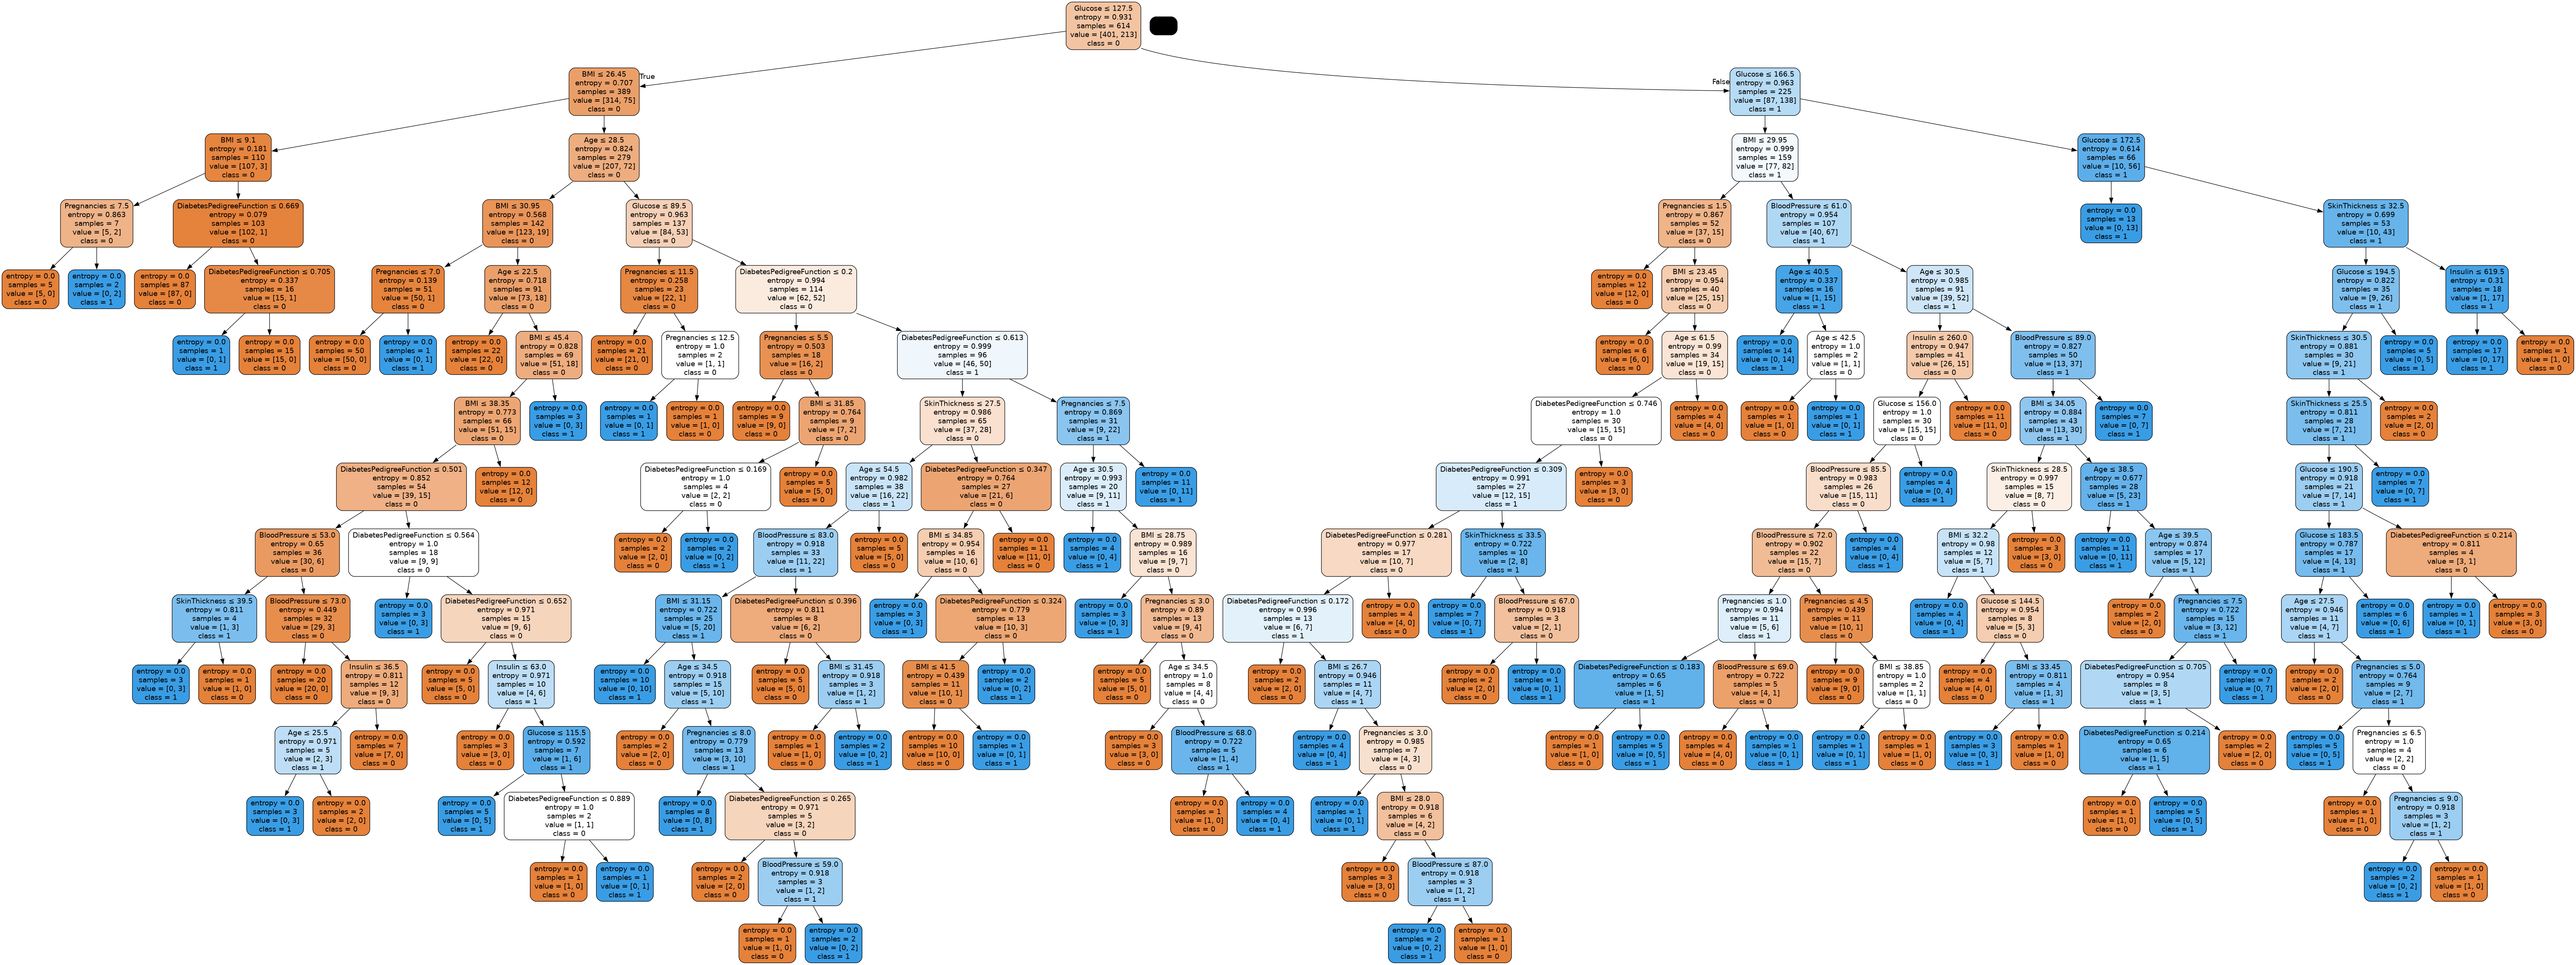

In [19]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [20]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


The classification rate increased to 79.87%, which is better accuracy than the previous model.



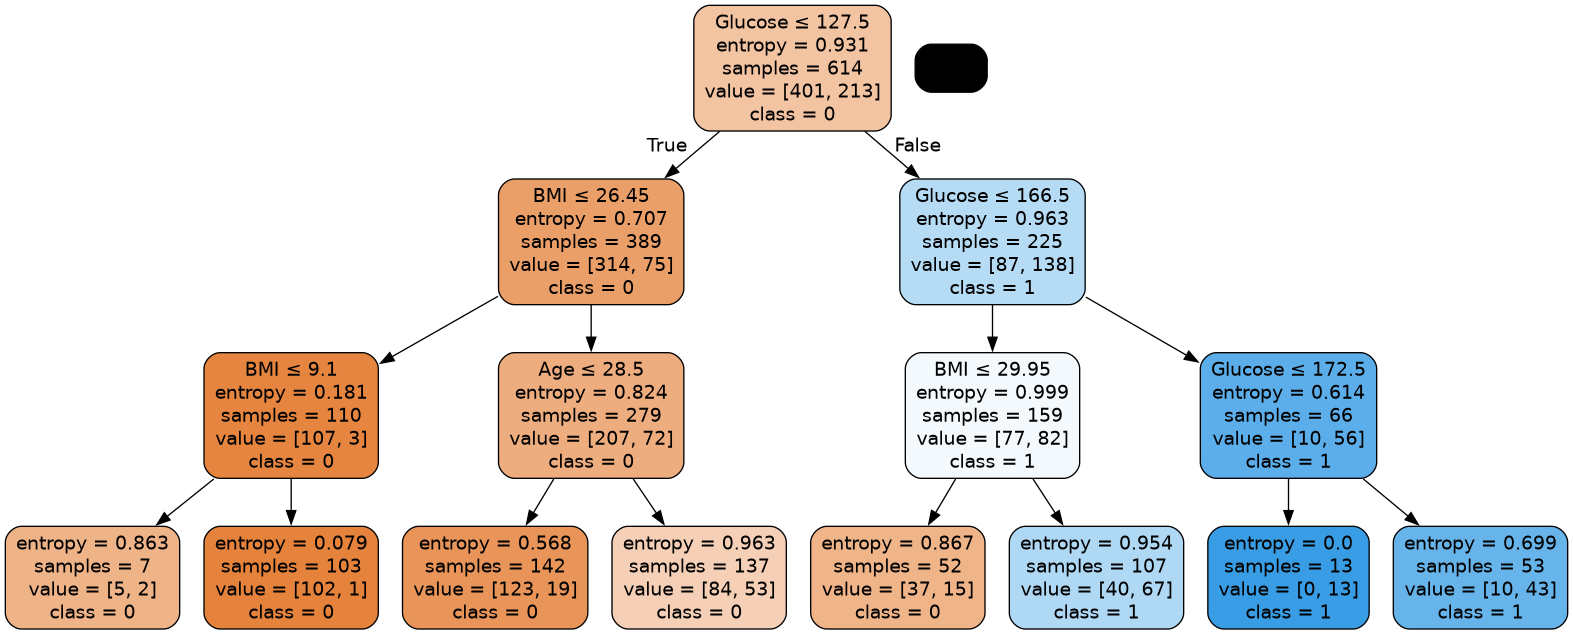

In [21]:
#Better Decision Tree Visualisation
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

Visualization of C4.5:

In [22]:
c45_classifier_mod = DecisionTreeClassifier(criterion="entropy",max_depth = 3)
c45_classifier_mod.fit(x_train[selected_features], y_train)

# Predict the response for test dataset
y_pred_c45_mod = c45_classifier_mod.predict(x_test[selected_features])

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_c45_mod) * 100
print("Accuracy (C4.5 with gain ratio normalization):", accuracy)

Accuracy (C4.5 with gain ratio normalization): 68.18181818181817


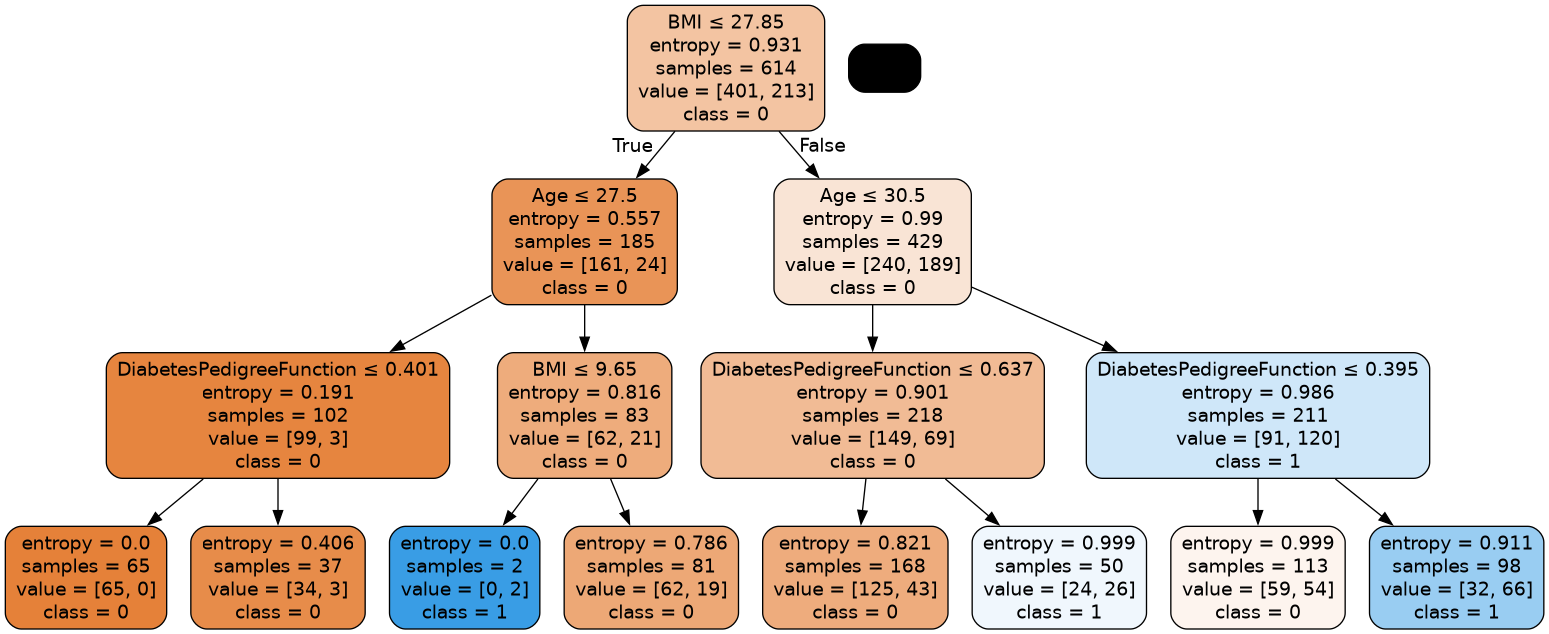

In [23]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(c45_classifier_mod, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = selected_features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

Visualization for CART:

CART Classification:

In [24]:
cart_classification_mod = DecisionTreeClassifier(criterion="gini",max_depth = 3)

cart_classification_mod.fit(x_train, y_train)

pred_cart_classification_mod = cart_classification_mod.predict(x_test)

accuracy = accuracy_score(y_test, pred_cart_classification_mod) * 100
print("Accuracy :", accuracy)

Accuracy : 78.57142857142857


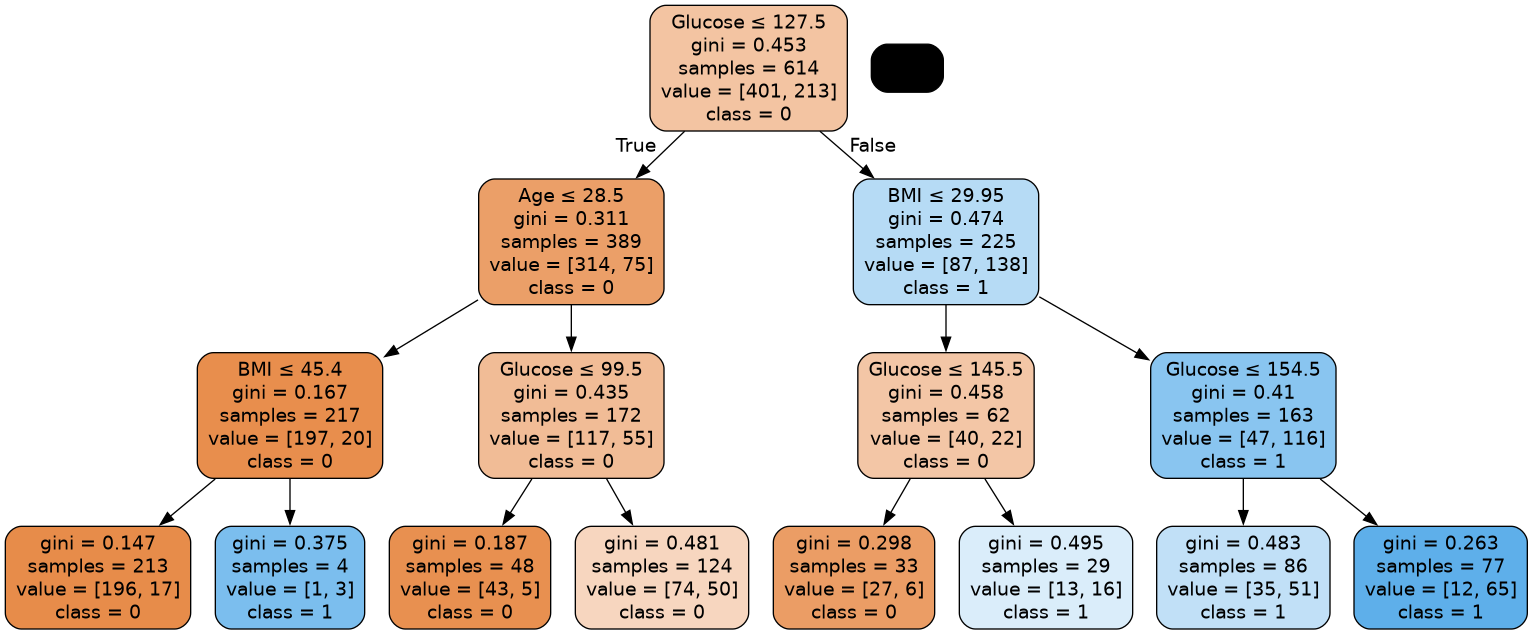

In [25]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(cart_classification_mod, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

CART regression:

In [26]:

# Create CART Decision Tree regressor object
cart_regressor_mod = DecisionTreeRegressor(criterion="friedman_mse",max_depth = 3)

# Train CART Decision Tree regressor
cart_regressor_mod.fit(x_train, y_train)

# Predict the response for test dataset
y_pred_cart_regression_mod = cart_regressor_mod.predict(x_test)




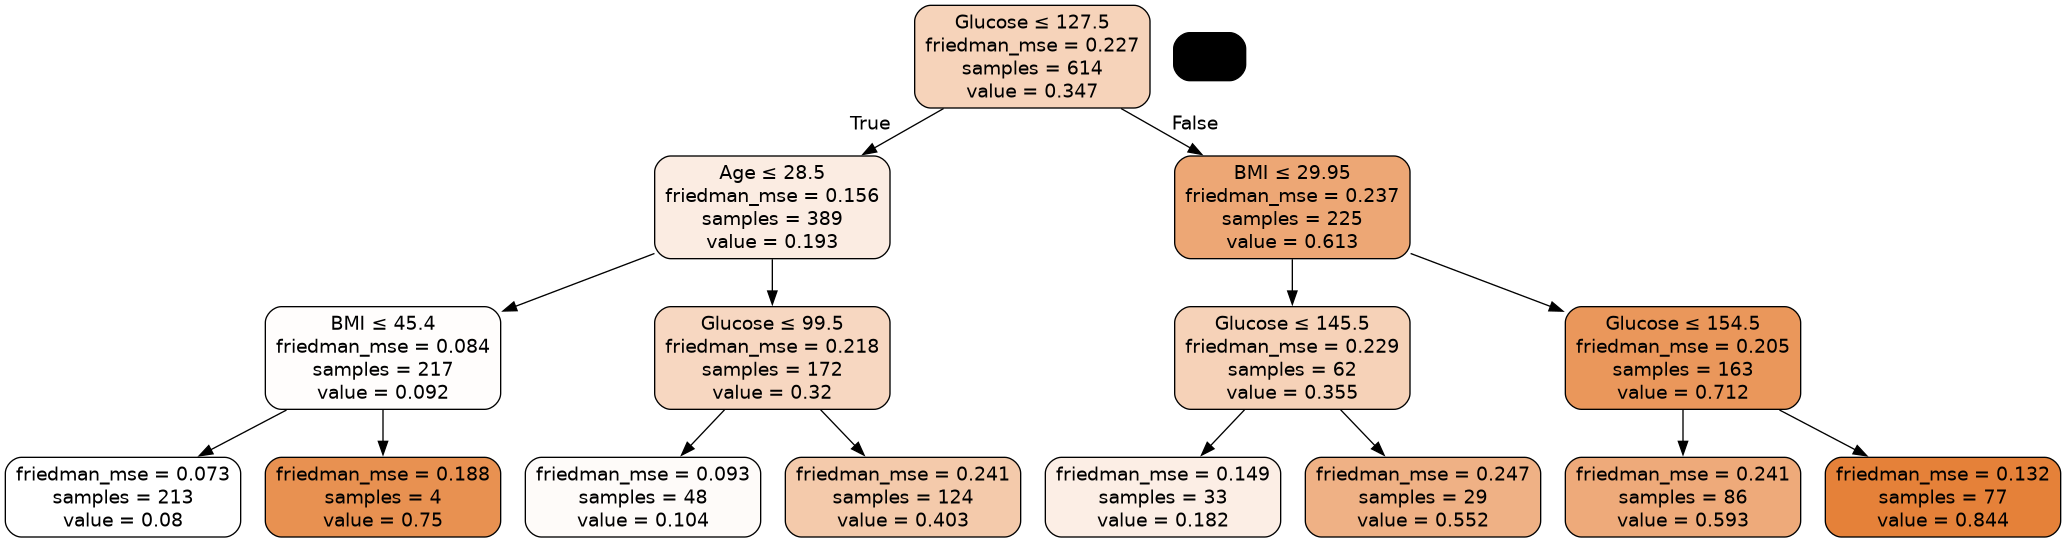

In [27]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(cart_regressor_mod, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

CHIAD:

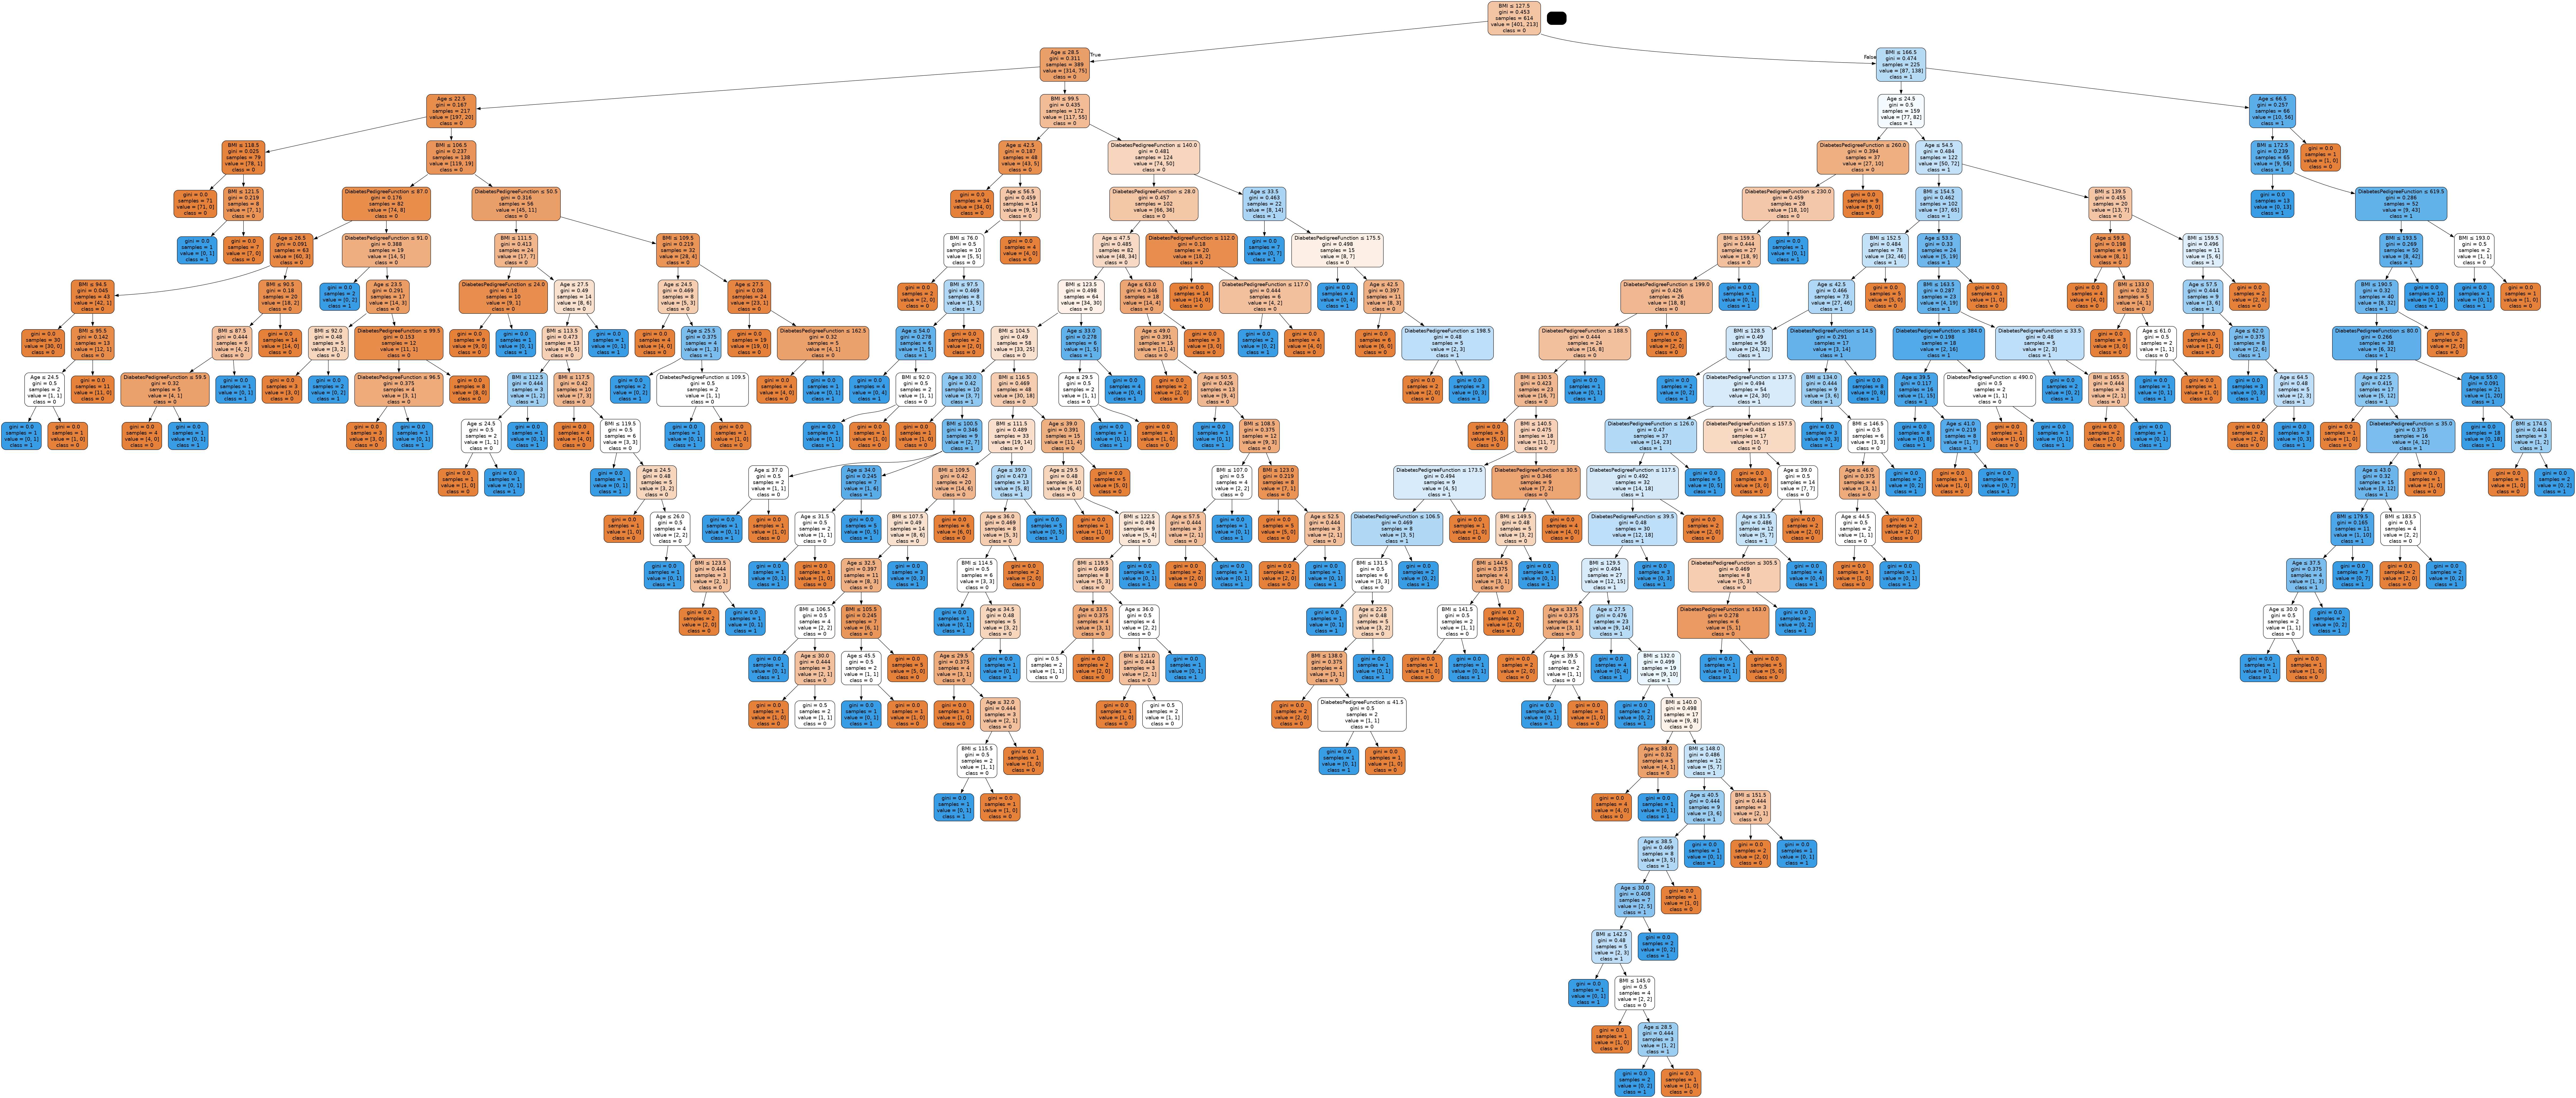

In [28]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(chiad, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = selected_features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

## Dataset having Discrete values

In [30]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/study-dataset/study_dataset.csv")

# Separate features and target variable
X = df.drop(columns=['Result'])
y = df['Result']

# Convert categorical variables into numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

## ID3

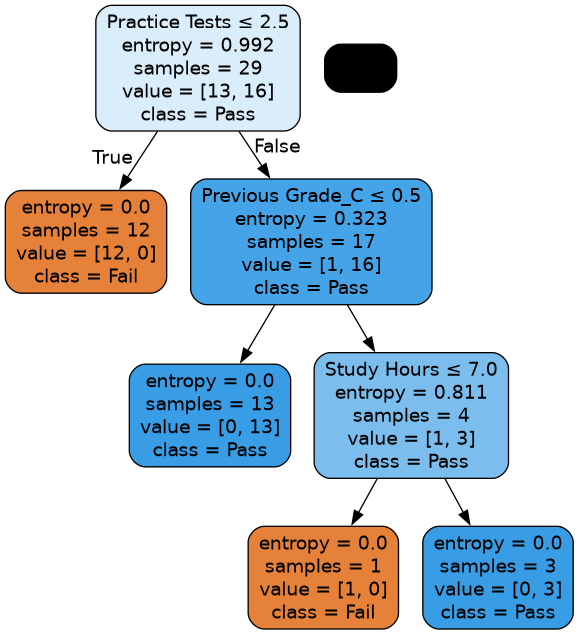

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Create ID3 Decision Tree classifier object
id3_classifier = DecisionTreeClassifier(criterion="entropy")

# Train ID3 Decision Tree classifier
id3_classifier.fit(X_encoded, y)

# Plotting the decision tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(id3_classifier, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=X_encoded.columns, class_names=['Fail', 'Pass'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## C4.5

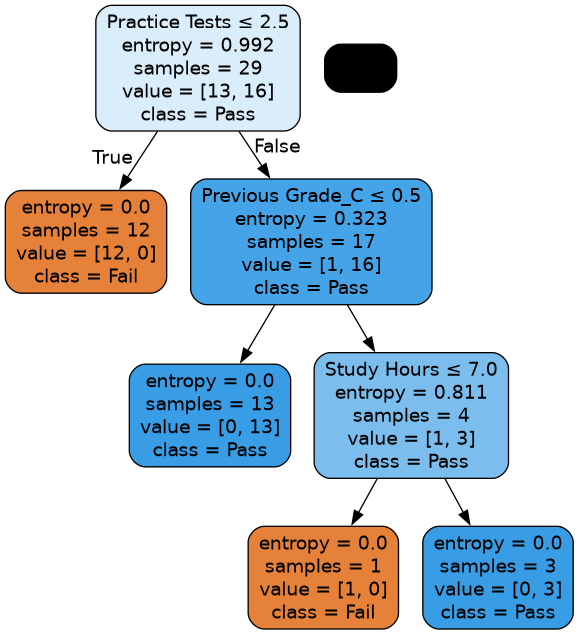

In [32]:
# Create C4.5 Decision Tree classifier object
c45_classifier = DecisionTreeClassifier(criterion="entropy")

# Train C4.5 Decision Tree classifier
c45_classifier.fit(X_encoded, y)

# Plotting the decision tree
dot_data = export_graphviz(c45_classifier, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=X_encoded.columns, class_names=['Fail', 'Pass'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


## CART

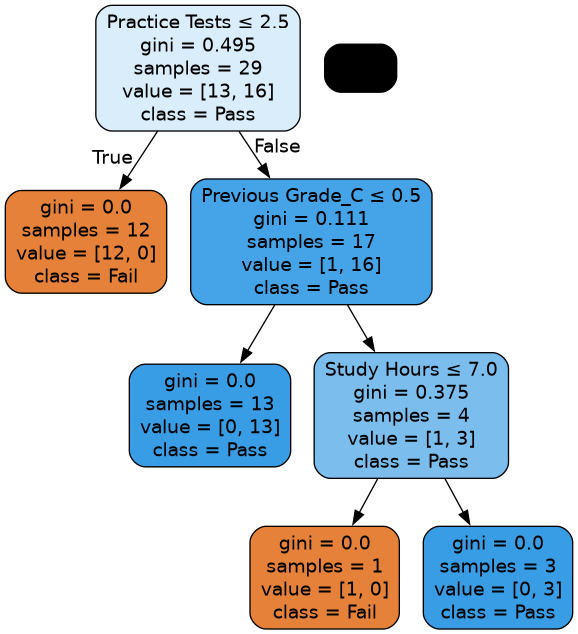

In [33]:
# Create CART Decision Tree classifier object
cart_classifier = DecisionTreeClassifier(criterion="gini")

# Train CART Decision Tree classifier
cart_classifier.fit(X_encoded, y)

# Plotting the decision tree
dot_data = export_graphviz(cart_classifier, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=X_encoded.columns, class_names=['Fail', 'Pass'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


## Chi-Squared

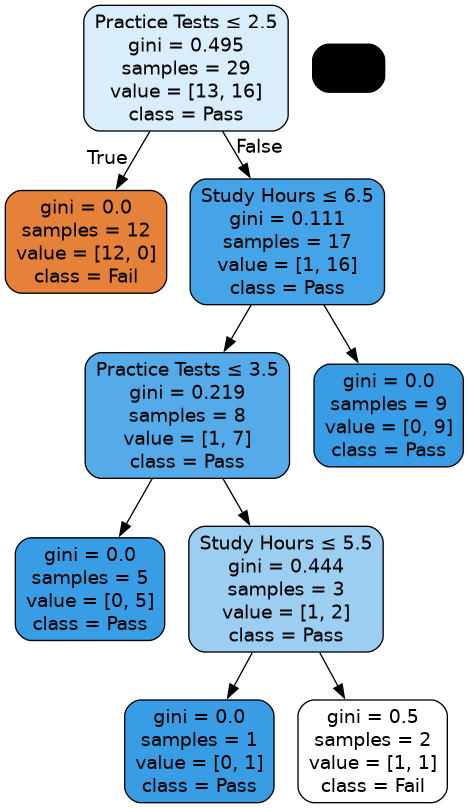

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the top features using chi-squared tests
k = 3  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X_encoded, y)

# Plotting the decision tree after feature selection
chiad = DecisionTreeClassifier()
chiad.fit(X_selected, y)

# Plotting the decision tree
dot_data = export_graphviz(chiad, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=X_encoded.columns[selector.get_support()], class_names=['Fail', 'Pass'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())